<a href="https://colab.research.google.com/github/deepakmelkani/ML-project-Cotton-Plant-Disease-Prediction-/blob/main/cotton_plat_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### v4, epochs 500

Project: Cotton Plant Disease Prediction & Get Cure App

In [2]:
#import libraries
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
# for accuracy and loss graph
import matplotlib.pyplot as plt

In [3]:
keras.__version__

'2.8.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_data_path = "/content/drive/MyDrive/data/train"
validation_data_path = "/content/drive/MyDrive/data/test"

In [6]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [7]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 2285 images belonging to 4 classes.


In [8]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [9]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 18 images belonging to 4 classes.


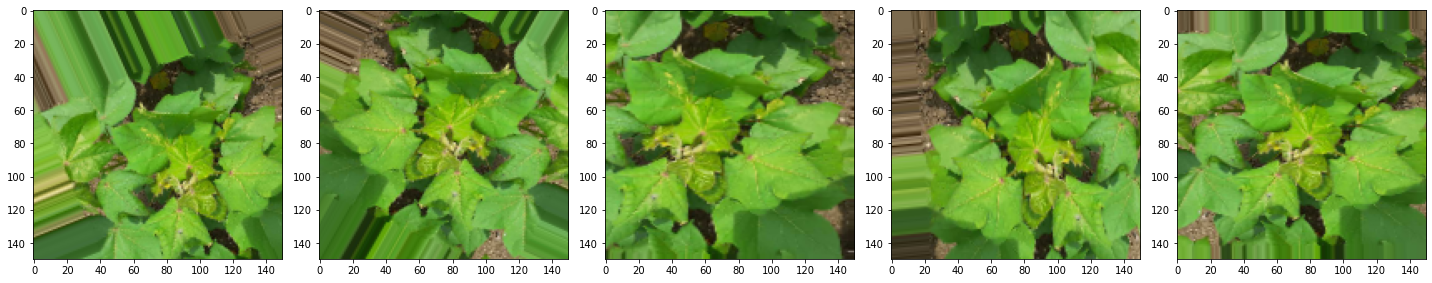

In [10]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [11]:
# save best model using vall accuracy
model_path = '/content/drive/My Drive/My ML Project /DL Project/CNN/cotton plant disease prediction/v4_pred_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [12]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=150, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/150
72/72 [==============================] - ETA: 0s - loss: 1.2286 - accuracy: 0.4429
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/My Drive/My ML Project /DL Project/CNN/cotton plant disease prediction/v4_pred_cott_dis.h5
72/72 [==============================] - 477s 6s/step - loss: 1.2286 - accuracy: 0.4429 - val_loss: 1.0626 - val_accuracy: 0.5000
Epoch 2/150
72/72 [==============================] - ETA: 0s - loss: 1.0146 - accuracy: 0.5589
Epoch 2: val_accuracy did not improve from 0.50000
72/72 [==============================] - 39s 537ms/step - loss: 1.0146 - accuracy: 0.5589 - val_loss: 1.2775 - val_accuracy: 0.4444
Epoch 3/150
72/72 [==============================] - ETA: 0s - loss: 0.9273 - accuracy: 0.6324
Epoch 3: val_accuracy did not improve from 0.50000
72/72 [==============================] - 38s 535ms/step - loss: 0.9273 - accuracy: 0.6324 - val_loss: 0.9052 - val_accuracy: 0.5000
Epoch 4/150
72/72 [=========================

In [15]:
model_path2 = '/content/drive/My Drive/My ML Project /DL Project/CNN/cotton plant disease prediction/v4_1_pred_cott_dis.h5'
cnn_model.save(model_path2)

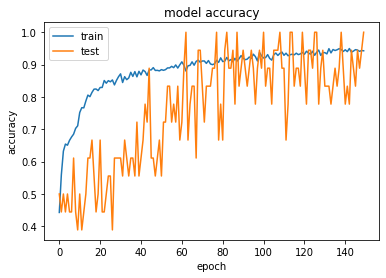

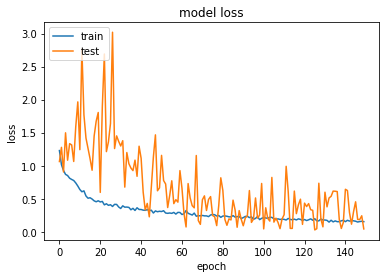

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
history.history

{'accuracy': [0.44288840889930725,
  0.5588621497154236,
  0.6323851346969604,
  0.6542669534683228,
  0.6507658362388611,
  0.6656455397605896,
  0.6761487722396851,
  0.6849015355110168,
  0.7028446197509766,
  0.7107220888137817,
  0.7518599629402161,
  0.7667396068572998,
  0.7663019895553589,
  0.7873085141181946,
  0.80568927526474,
  0.8008752465248108,
  0.8140043616294861,
  0.8240700364112854,
  0.8245076537132263,
  0.8196936249732971,
  0.8293216824531555,
  0.8293216824531555,
  0.8507658839225769,
  0.842450737953186,
  0.8503282070159912,
  0.8468271493911743,
  0.8525164127349854,
  0.8371991515159607,
  0.8512035012245178,
  0.8625820279121399,
  0.8713347911834717,
  0.8446389436721802,
  0.8625820279121399,
  0.853391706943512,
  0.8586433529853821,
  0.8761488199234009,
  0.8634573221206665,
  0.8783369660377502,
  0.862144410610199,
  0.8792122602462769,
  0.8682713508605957,
  0.8831509947776794,
  0.8783369660377502,
  0.8665207624435425,
  0.8835886120796204,
  